In [11]:
import pandas as pd
from pandas import read_csv

from matplotlib.pyplot import subplots,show
from sklearn import datasets
from numpy import corrcoef, fill_diagonal,triu_indices,arange
from numpy import mean


In [12]:
df_breast_cancer=read_csv('breast_cancer.csv')
df_breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Summary(univariate) statistics of column2-10 using describe

In [13]:
df_breast_cancer_describe=df_breast_cancer.iloc[:,1:10].describe()
df_breast_cancer_describe.round()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0
std,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0
min,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0
25%,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0
50%,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0
75%,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0
max,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0


# Means of each column as a bar chart with standard deviation as error bars

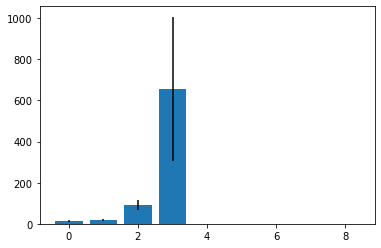

In [15]:
fig,ax=subplots()
bins= arange(df_breast_cancer_describe.shape[1])
ax.bar(bins,df_breast_cancer_describe.loc['mean'],yerr=df_breast_cancer_describe.loc['std'])
show()

In [16]:
# some of the bars are not visible because the range on the x coordinates are bg

# Extracting values as numpy array using to_numpy with shape(569,31)

In [17]:
breast_cancer_numpy=df_breast_cancer.to_numpy()
breast_cancer_numpy.shape

(569, 31)

# correlation matrix  corrcoef from Numpy and plotting as a heatmap

In [19]:
breast_cancer_corr=corrcoef(breast_cancer_numpy,rowvar=False)
breast_cancer_corr.shape

(31, 31)

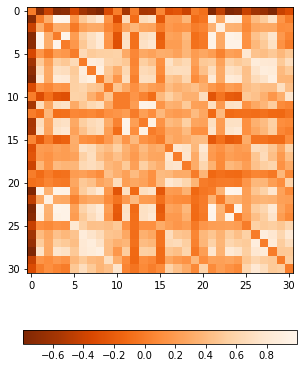

In [23]:
from numpy import fill_diagonal
fill_diagonal(breast_cancer_corr,0)
fig, ax = subplots(figsize=(7,7))
im=ax.imshow(breast_cancer_corr,cmap='Oranges_r');
fig.colorbar(im,orientation='horizontal', shrink=0.7);
show()

# Average column correlation and plot as a bar chart

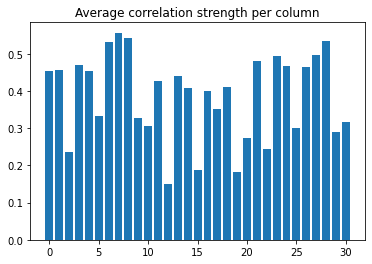

In [24]:
breast_cancer_column_average=mean(abs(breast_cancer_corr), axis=0)
fig, ax = subplots()
bins = arange(len(breast_cancer_column_average))
ax.bar(bins,breast_cancer_column_average);
ax.set_title('Average correlation strength per column');
show()

# Average correlation strengths

In [25]:
breast_cancer_corr_matrix_average=mean(abs(breast_cancer_corr))
print('Average Correlation Strength:', round(breast_cancer_corr_matrix_average, 3))

Average Correlation Strength: 0.387
